In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline



In [2]:
# Open Earthchem dataset
df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
columns = df.keys()
df.columns = columns
df

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,...,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,...,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,...,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.3014,-69.2431,0.01,2.6,12.80,...,101.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


# Drop rows with no Silica values 
To see if a sample is obsidian, we need to know their silica value

In [3]:
df.dropna(subset=['SIO2'])

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,...,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,...,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,...,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,AJO 017,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.2167,-69.2125,0.01,2.6,12.80,...,73.0,NaN,NaN,NaN,NaN,NaN,0.79,NaN,0.79,NaN
3057,AJO017,NaN,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",NaN,-18.2458,-69.2194,0.01,NaN,NaN,...,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.3014,-69.2431,0.01,2.6,12.80,...,101.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN


In [4]:
# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns

Index(['SAMPLE ID', 'SOURCE', 'REFERENCE', 'LATITUDE', 'LONGITUDE', 'LOC PREC',
       'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME', 'SIO2', 'TIO2', 'AL2O3',
       'FEOT', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR',
       'TH', 'ZR'],
      dtype='object')

# Classification vs Clustering

Try it on the 4 seperated locations

In [5]:
target = {'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10,
          'SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NARANJO, J. A.; LARA, L. E.; MORENO-ROA, HUGO, 2008':11,
          'HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; FREY, F. A.; MORENO-ROA, HUGO, 2016':12,
          'GODOY, B.; WÖRNER, G.; KOJIMA, S.; AGUILERA, F.; SIMON, K.; HARTMANN, G., 2014':13,
          'HASCHKE, M.; SIEBEL, W.; GÜNTHER, A.; SCHEUBER, E., 2002':14,
          'JICHA, B. R.; SINGER, B. S.; BEARD, B. L.; JOHNSON, CLARK M.; MORENO-ROA, HUGO; NARANJO, J. A., 2007':15,
          'ULRICH, T.; HEINRICH, C. A., 2001':16,
          'KLEIMAN, L. E.; JAPAS, M. S., 2009':17,
          'BENEDINI, L.; GREGORI, D. A., 2013':18,
          'RICHARDS, J. P.; BOYCE, A. J.; PRINGLE, M. S., 2001':19,
          'HIGGINS, M. D.; VOOS, S.; VANDER AUWERA, J., 2015':20
          }

data_twenty = df

data_twenty['target']= data_twenty['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_twenty['target'] = data_twenty['target'].fillna(0)
# Make target column int
data_twenty['target'] = data_twenty['target'].astype(float).astype(int)

# Drop targets that are not the 4 references
data_twenty = data_twenty[data_twenty['target'] >=1]

data_twenty


<ipython-input-5-7ffac1de97a9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_twenty['target']= data_twenty['REFERENCE'].map(target)
<ipython-input-5-7ffac1de97a9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_twenty['target'] = data_twenty['target'].fillna(0)
<ipython-input-5-7ffac1de97a9>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,...,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,...,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.6000,282.0,12
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,...,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.3000,195.0,12
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,...,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.3000,307.0,11
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,...,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.1800,342.0,11
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,...,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.8200,308.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,CG 327,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,...,2.604,3.406,4.508,0.240,516.7,261.3,294.4,31.1000,173.3,2
3054,DBF 111,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.1972,-69.2719,0.01,igneous,volcanic,felsic,rhyolite,...,1.666,4.095,4.506,0.100,301.0,88.0,99.0,12.9154,118.0,1
3056,AJO 017,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.2167,-69.2125,0.01,igneous,volcanic,felsic,rhyolite,...,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.0000,73.0,1
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,...,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.0000,101.0,1


In [6]:
features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

data_twenty = data_twenty.dropna()

X = data_twenty[features]
X = X.drop(['target'],axis = 1)
y = data_twenty['target']
y.unique()

array([12, 11, 15,  1,  3,  2,  6, 14, 10,  7, 20,  5, 17,  8, 13, 16,  9,
        4, 18, 19])

In [7]:
X

,LATITUDE,LONGITUDE,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,-41.1000,-72.4930,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.6000,282.0
1,-41.1000,-72.4930,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.3000,195.0
2,-40.5088,-72.2060,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.3000,307.0
3,-40.5275,-72.1812,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.1800,342.0
4,-40.5675,-72.1743,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.8200,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,-25.8500,-66.8100,69.618,0.581,15.226,3.005,0.040,0.771,2.604,3.406,4.508,0.240,516.7,261.3,294.4,31.1000,173.3
3054,-18.1972,-69.2719,72.940,0.351,13.739,1.860,0.040,0.703,1.666,4.095,4.506,0.100,301.0,88.0,99.0,12.9154,118.0
3056,-18.2167,-69.2125,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.0000,73.0
3061,-18.3014,-69.2431,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.0000,101.0


In [8]:
names = y.unique()

In [9]:
names = y.unique()
names

array([12, 11, 15,  1,  3,  2,  6, 14, 10,  7, 20,  5, 17,  8, 13, 16,  9,
        4, 18, 19])

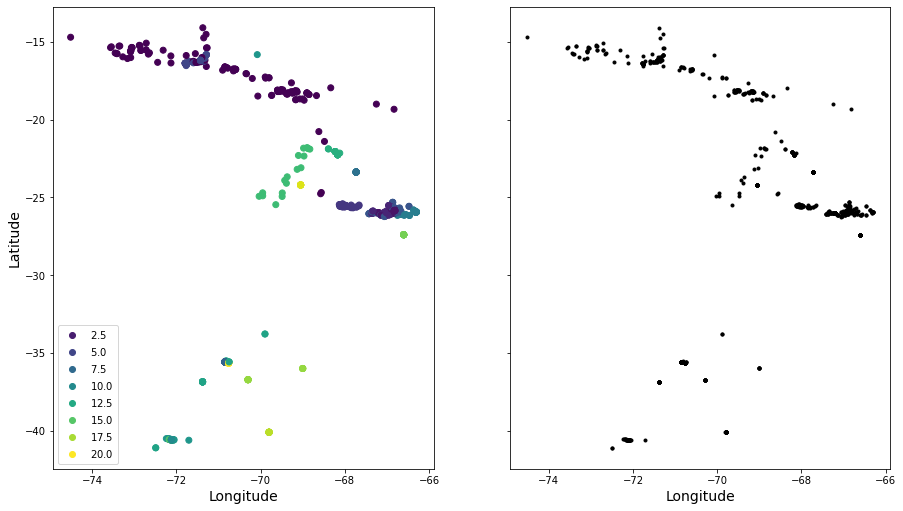

In [10]:
# Plotting targets on lat vs. long 


plt.figure(figsize=(15, 8.5))
plt.subplot(121)

s = plt.scatter(X['LONGITUDE'], X['LATITUDE'],c = y)
plt.legend(*s.legend_elements())

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)


plt.subplot(122)
plt.scatter(X['LONGITUDE'], X['LATITUDE'], c="k", marker=".")
plt.xlabel("Longitude", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

# GAUSSIAN MIXTURE MODEL

In [11]:
from sklearn.mixture import GaussianMixture

In [12]:
y_pred = GaussianMixture(n_components=20,
                         random_state=42).fit(X).predict(X)

In [13]:
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{2: 1, 11: 6, 12: 19, 3: 18, 15: 20, 16: 16, 4: 15, 0: 13, 5: 14, 9: 17}

In [14]:
#y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

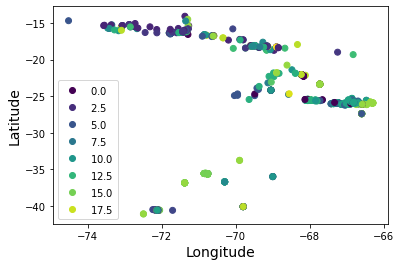

In [15]:
s = plt.scatter(X['LONGITUDE'], X['LATITUDE'],c = y_pred)
plt.legend(*s.legend_elements())
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.show()

In [16]:
np.sum(y_pred==y)

43

In [17]:
np.sum(y_pred==y) / len(y_pred)

0.0625

# Kmeans

In [18]:
data_twenty_elements = data_twenty[features]
data_twenty_elements = data_twenty_elements.drop(['LATITUDE','LONGITUDE','target'],axis=1)
data_twenty_elements

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.6000,282.0
1,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.3000,195.0
2,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.3000,307.0
3,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.1800,342.0
4,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.8200,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,69.618,0.581,15.226,3.005,0.040,0.771,2.604,3.406,4.508,0.240,516.7,261.3,294.4,31.1000,173.3
3054,72.940,0.351,13.739,1.860,0.040,0.703,1.666,4.095,4.506,0.100,301.0,88.0,99.0,12.9154,118.0
3056,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.0000,73.0
3061,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.0000,101.0


In [19]:
#PCA
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data_twenty_elements)
 
df.shape

(688, 2)

In [20]:
#Initialize the class object
kmeans = KMeans(n_clusters= 20, random_state = 42)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)

score = silhouette_score(df, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.426


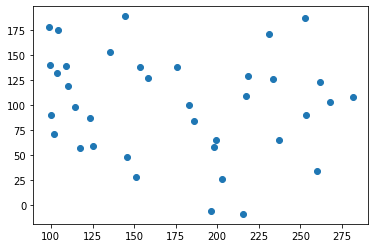

In [21]:
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

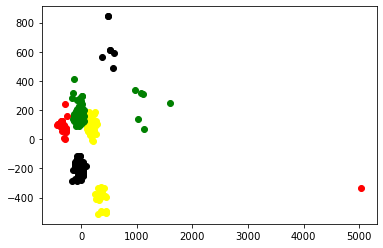

In [22]:
#filter rows of original data
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label0 = df[label == 0]
filtered_label4 = df[label == 4]
filtered_label5 = df[label == 5]
filtered_label6 = df[label == 6]
filtered_label7 = df[label == 7]

#Plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green')
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'yellow')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'red')
plt.scatter(filtered_label5[:,0] , filtered_label5[:,1] , color = 'black')
plt.scatter(filtered_label6[:,0] , filtered_label6[:,1] , color = 'green')
plt.scatter(filtered_label7[:,0] , filtered_label7[:,1] , color = 'yellow')

plt.show()

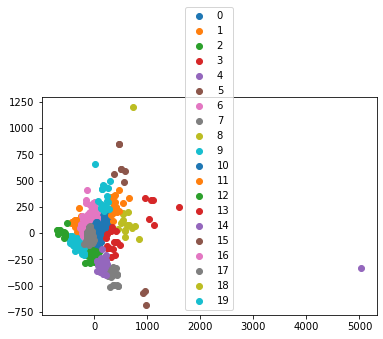

In [23]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

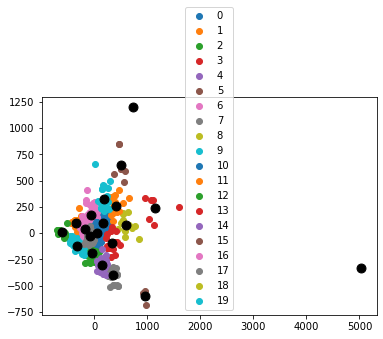

In [24]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [25]:
centroids

array([[ 1.74843471e+02,  1.00790890e+02],
       [-3.35338885e+02,  9.17153812e+01],
       [-3.35774616e+01, -1.89494512e+02],
       [ 1.14925663e+03,  2.37795035e+02],
       [ 5.03379329e+03, -3.36737706e+02],
       [ 5.01644311e+02,  6.50474365e+02],
       [-4.90568324e+01,  1.76102323e+02],
       [ 3.57440750e+02, -4.02755835e+02],
       [ 6.09000679e+02,  7.61518637e+01],
       [-3.17104279e+02, -1.21996357e+02],
       [ 5.36523283e+01,  4.52996714e+00],
       [ 4.04636164e+02,  2.61362209e+02],
       [-6.13521878e+02,  1.07286174e+01],
       [ 3.34518879e+02, -9.09331041e+01],
       [ 1.50299597e+02, -3.04302391e+02],
       [ 9.55779065e+02, -6.02552176e+02],
       [-1.77995088e+02,  3.77302754e+01],
       [-8.12119254e+01, -2.48287887e+01],
       [ 7.33771084e+02,  1.19837065e+03],
       [ 1.79450118e+02,  3.27366479e+02]])

In [26]:
# Calculate Silhoutte Score

score = silhouette_score(df, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.426


In [27]:
data_twenty_elements

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.6000,282.0
1,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.3000,195.0
2,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.3000,307.0
3,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.1800,342.0
4,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.8200,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,69.618,0.581,15.226,3.005,0.040,0.771,2.604,3.406,4.508,0.240,516.7,261.3,294.4,31.1000,173.3
3054,72.940,0.351,13.739,1.860,0.040,0.703,1.666,4.095,4.506,0.100,301.0,88.0,99.0,12.9154,118.0
3056,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.0000,73.0
3061,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.0000,101.0


In [28]:
y = data_twenty['target']
X = data_twenty_elements[['SIO2','TIO2','AL2O3','FEOT','MNO','MGO','CAO','NA2O','K2O','P2O5',
                       'BA','RB','SR','TH','ZR']]

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.1453815336864514
For n_clusters = 4 The average silhouette_score is : 0.22311774229419384
For n_clusters = 6 The average silhouette_score is : 0.28963116747186274
For n_clusters = 8 The average silhouette_score is : 0.3649353085472354
For n_clusters = 10 The average silhouette_score is : 0.4441407612018475
For n_clusters = 12 The average silhouette_score is : 0.5121886678785813
For n_clusters = 14 The average silhouette_score is : 0.5874557373806876
For n_clusters = 16 The average silhouette_score is : 0.6528536785740594
For n_clusters = 17 The average silhouette_score is : 0.690660343731338
For n_clusters = 18 The average silhouette_score is : 0.7234698887173411
For n_clusters = 19 The average silhouette_score is : 0.7574070105603785
For n_clusters = 20 The average silhouette_score is : 0.7821459744540605


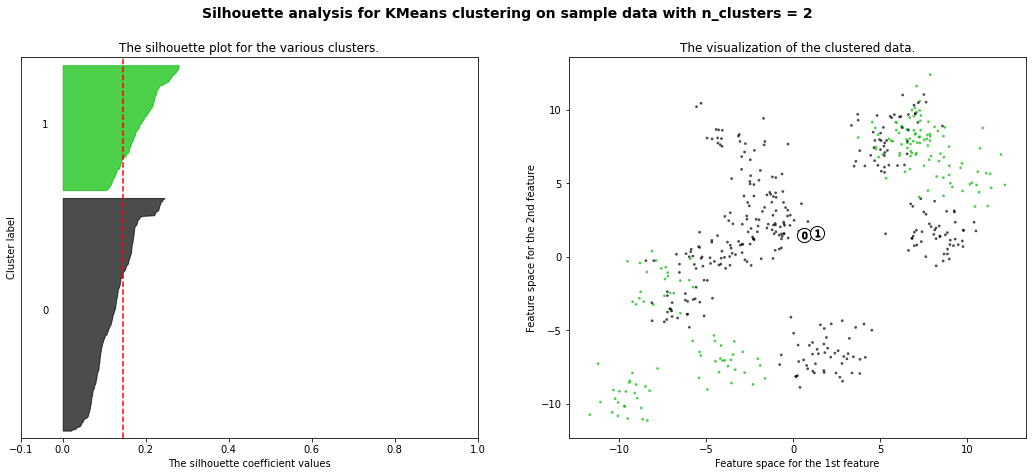

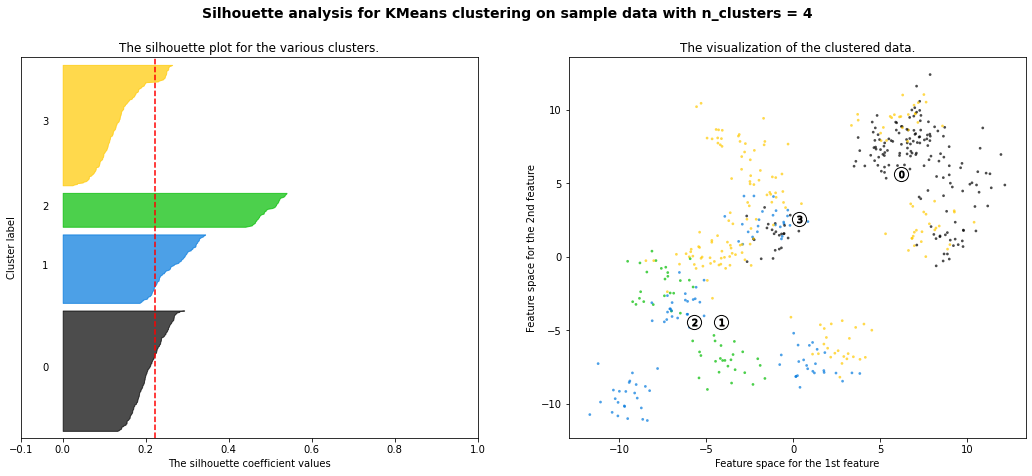

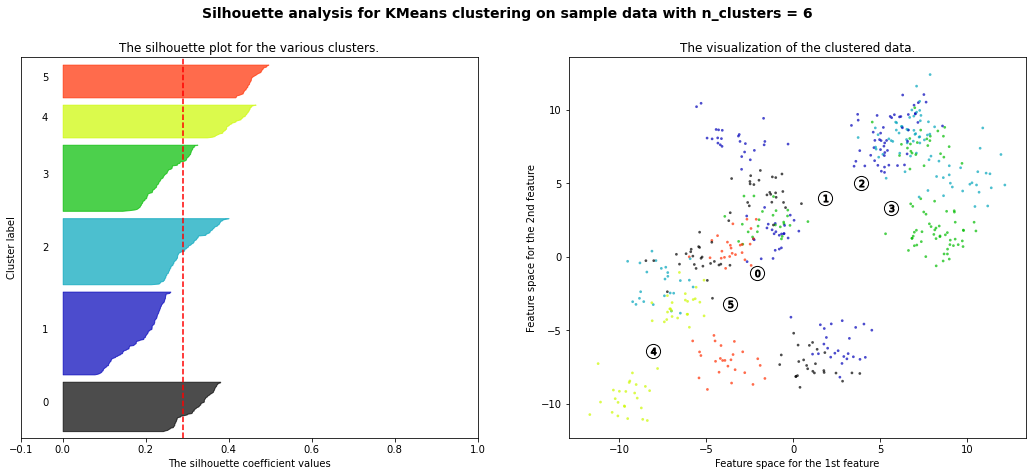

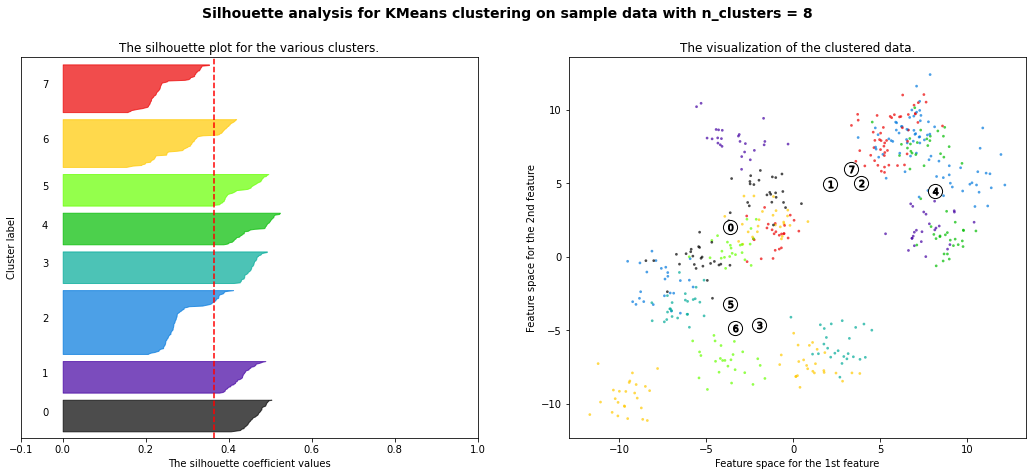

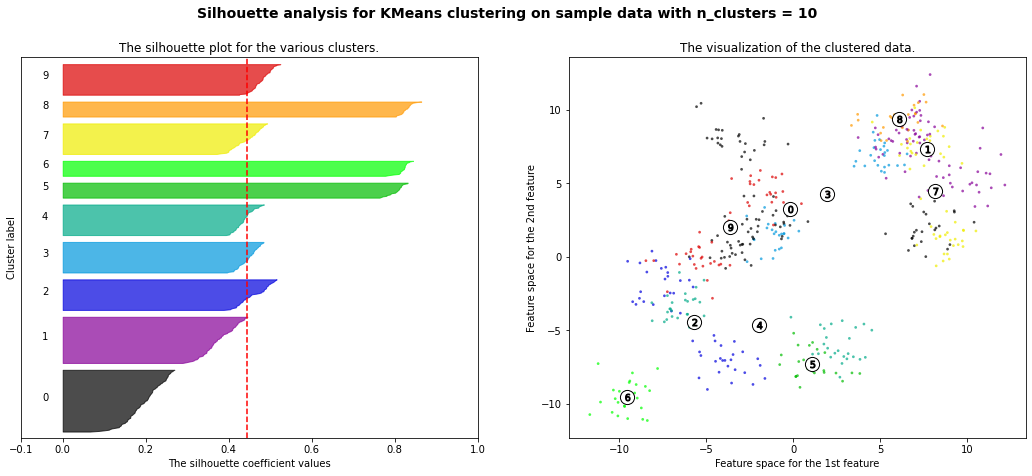

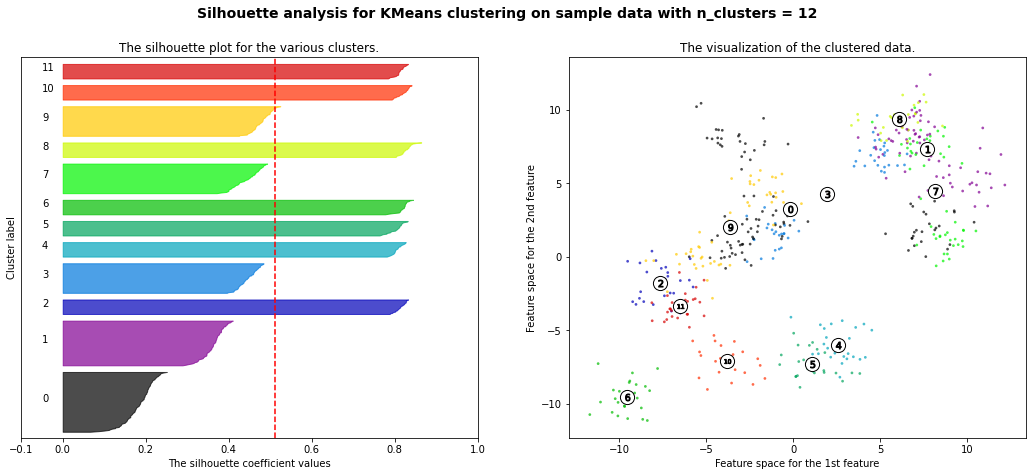

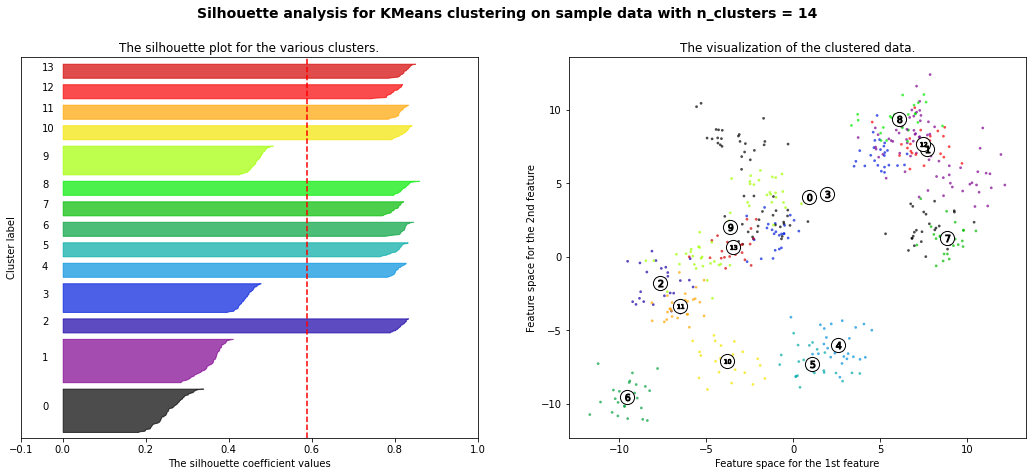

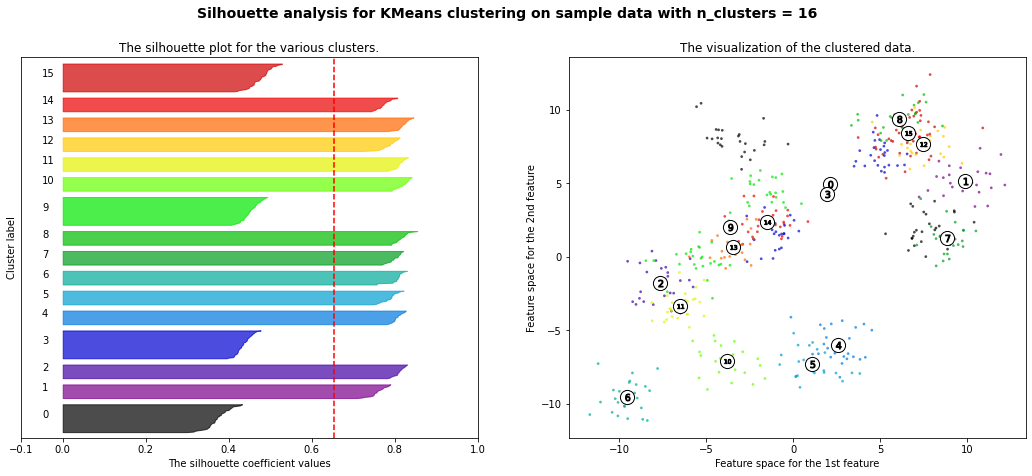

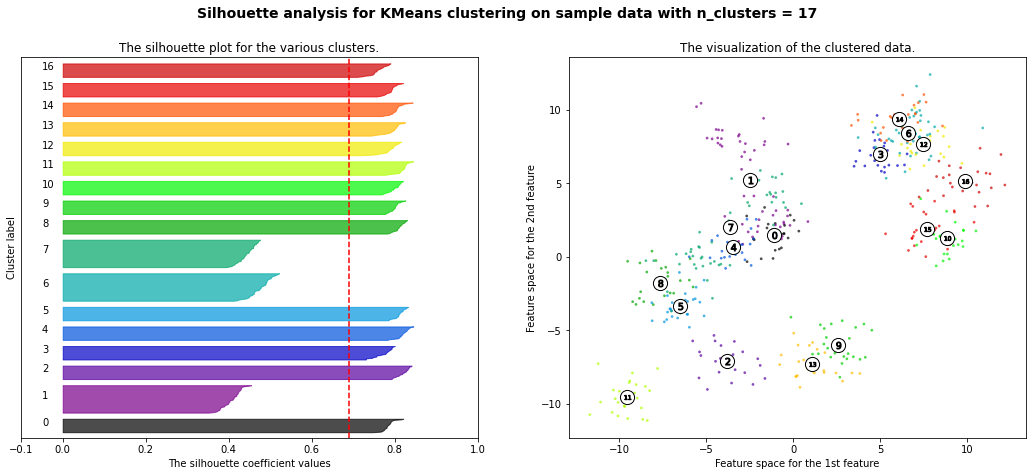

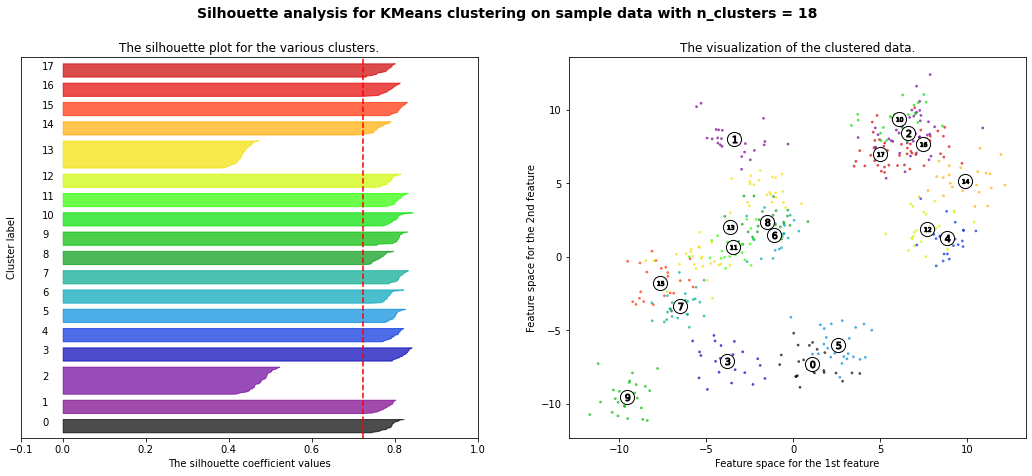

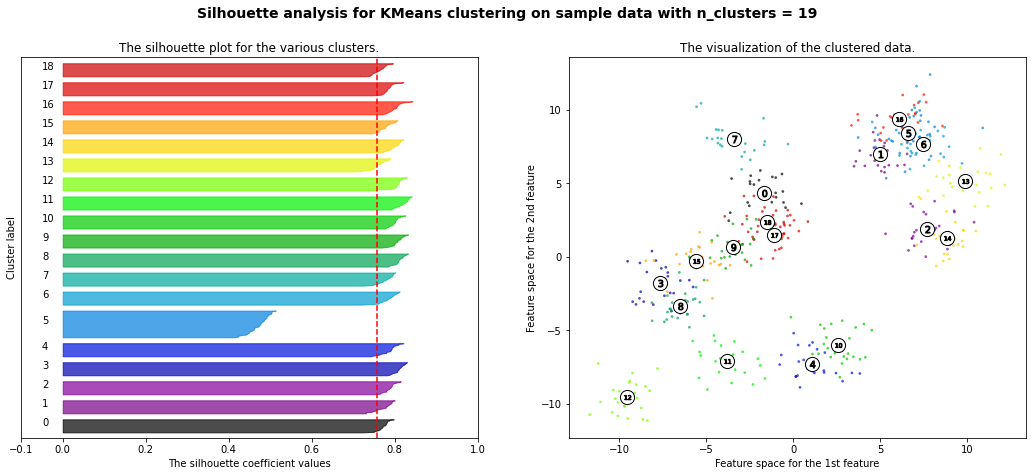

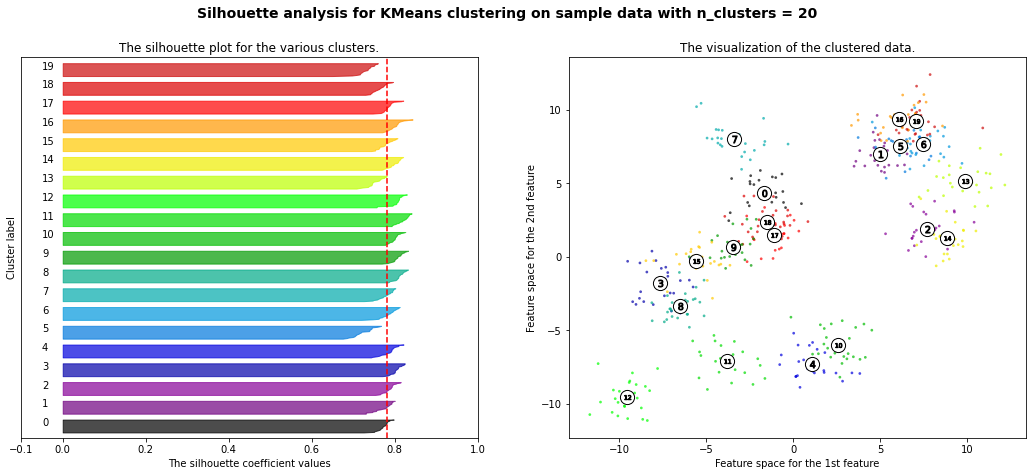

In [29]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=20,
                  centers=20,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2,4,6,8,10,12,14,16,17,18,19,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [30]:
# OTHER

In [31]:
y = data_twenty['target']
X = data_twenty[['SIO2','TIO2','AL2O3','FEOT','MNO','MGO','CAO','NA2O','K2O','P2O5',
                       'BA','RB','SR','TH','ZR']]

In [32]:
X, y = make_blobs(n_samples=3000,
                  centers=20,
                  cluster_std=1,
                  shuffle=True,
                  random_state=42)  # For reproducibility

In [33]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

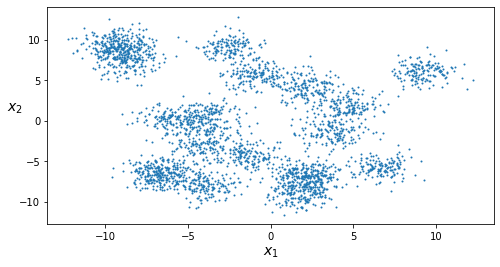

In [34]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
#save_fig("blobs_plot")
plt.show()

In [35]:
# Fit n Predict

In [36]:
k = 20
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

In [37]:
y_pred

array([14,  8, 16, ..., 12,  8, 10], dtype=int32)

In [38]:
y_pred is kmeans.labels_

True

In [39]:
kmeans.cluster_centers_

array([[-1.28050103, -4.28981307],
       [-1.0287118 ,  5.74588503],
       [-8.79685043,  7.15113299],
       [ 4.74053998,  1.86888504],
       [-3.93444681, -8.03729208],
       [ 6.65878562, -5.73677523],
       [-6.28203008,  0.1053037 ],
       [ 2.21588173, -6.59904576],
       [ 9.21118293,  6.12242385],
       [-2.55101411,  9.19530569],
       [-6.80156785, -6.50765319],
       [-4.3145775 , -3.48421239],
       [-9.94346385,  9.54712911],
       [ 1.74617317, -9.02312136],
       [ 3.6737201 , -1.46480395],
       [-8.15589367,  9.31923082],
       [ 2.54396795,  5.10159289],
       [-3.86624729,  1.13948108],
       [ 1.79227269,  3.44314331],
       [-3.64103818, -1.05312361]])

In [40]:
kmeans.labels_

array([14,  8, 16, ..., 12,  8, 10], dtype=int32)

In [41]:
kmeans

KMeans(n_clusters=20, random_state=42)

In [42]:
# Decision Boundaries

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1],'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

No handles with labels found to put in legend.


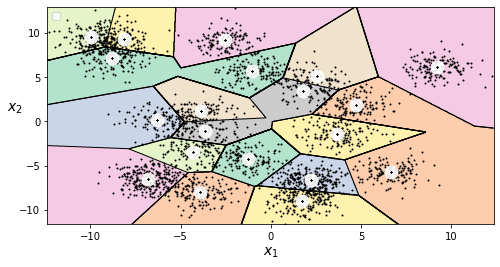

In [43]:
plt.figure(figsize=(8, 4))

plot_decision_boundaries(kmeans, X)
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()


In [44]:
# Hard vs Soft clustering

In [45]:
# Predict new instances


X_new = np.array([[0,1],[2,3]])
kmeans.predict(X_new)
kmeans.transform(X_new)

array([[ 5.44259177,  4.85609645, 10.73410521,  4.8195104 ,  9.85659779,
         9.47225245,  6.34542224,  7.91553083, 10.53969246,  8.58316423,
        10.13045812,  6.22284017, 13.1120513 , 10.17408878,  4.42396631,
        11.65024476,  4.82647253,  3.86876247,  3.03004796,  4.18000904],
       [ 7.99393905,  4.08815115, 11.5673629 ,  2.96479011, 12.53153923,
         9.90128906,  8.77332827,  9.60147303,  7.85816072,  7.6872324 ,
        12.95619797,  9.050906  , 13.62025067, 12.0258004 ,  4.76820861,
        11.96139016,  2.17085094,  6.15421708,  0.48941458,  6.94615884]])

In [46]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[ 5.44259177,  4.85609645, 10.73410521,  4.8195104 ,  9.85659779,
         9.47225245,  6.34542224,  7.91553083, 10.53969246,  8.58316423,
        10.13045812,  6.22284017, 13.1120513 , 10.17408878,  4.42396631,
        11.65024476,  4.82647253,  3.86876247,  3.03004796,  4.18000904],
       [ 7.99393905,  4.08815115, 11.5673629 ,  2.96479011, 12.53153923,
         9.90128906,  8.77332827,  9.60147303,  7.85816072,  7.6872324 ,
        12.95619797,  9.050906  , 13.62025067, 12.0258004 ,  4.76820861,
        11.96139016,  2.17085094,  6.15421708,  0.48941458,  6.94615884]])

In [47]:
kmeans_iter1 = KMeans(n_clusters=20, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=42)
kmeans_iter2 = KMeans(n_clusters=20, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=42)
kmeans_iter3 = KMeans(n_clusters=20, init="random", n_init=2,
                     algorithm="full", max_iter=9, random_state=42)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)


KMeans(algorithm='full', init='random', max_iter=9, n_clusters=20, n_init=2,
       random_state=42)

No handles with labels found to put in legend.


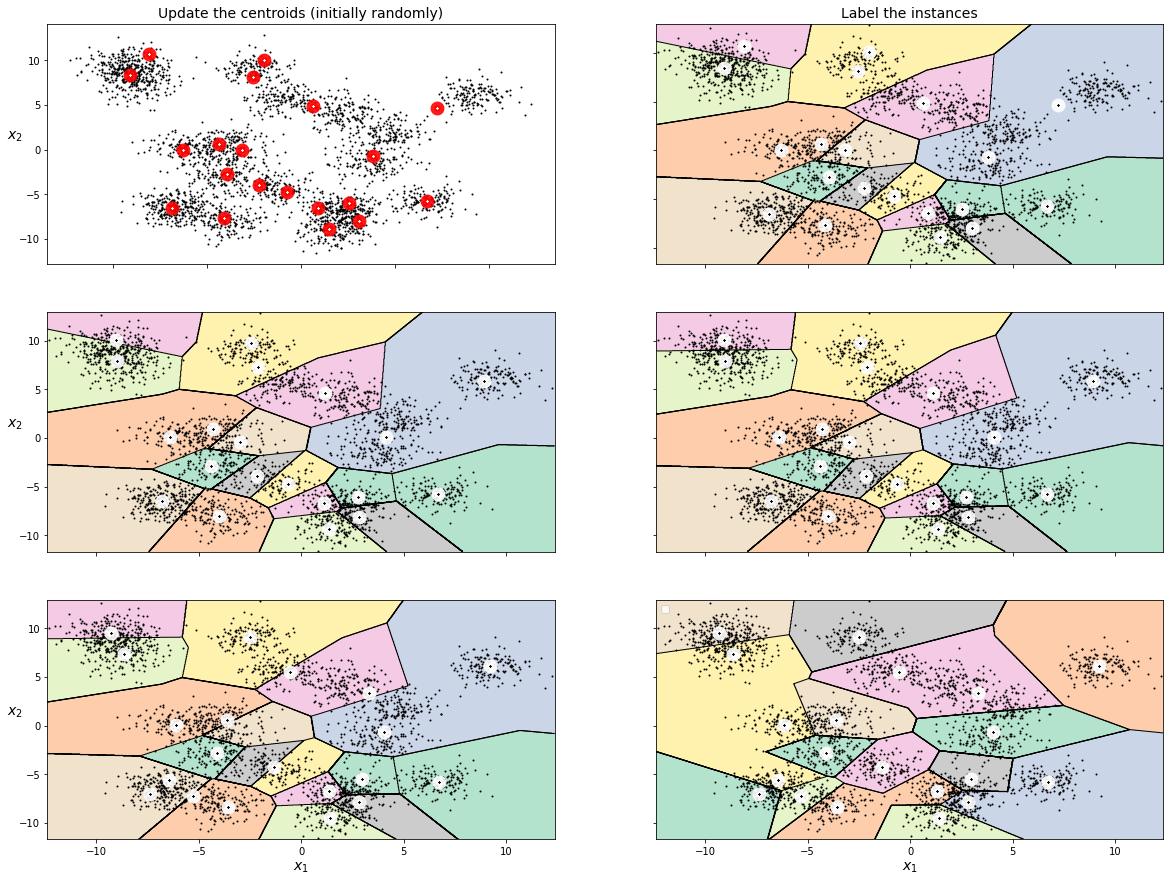

In [48]:
plt.figure(figsize=(20, 15))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.legend(loc='upper left')

#save_fig("kmeans_algorithm_plot")
plt.show()

In [49]:
# Variability

In [50]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

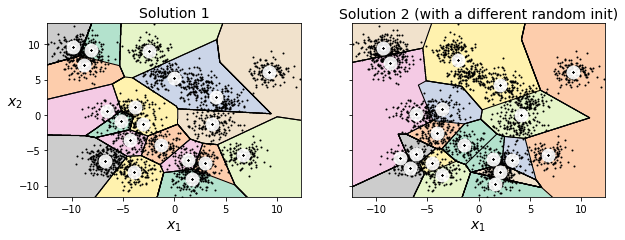

In [51]:
kmeans_rnd_init1 = KMeans(n_clusters=20, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=20, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

#save_fig("kmeans_variability_plot")
plt.show()

In [52]:
# Inertia

kmeans.inertia_

4696.277210743681

In [53]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

4696.277210743678

In [54]:
kmeans.score(X)

-4696.277210743681

In [55]:
# Finding optimal number of clusters

<ipython-input-42-6b9359b95bd7>:27: UserWarning: No contour levels were found within the data range.
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),


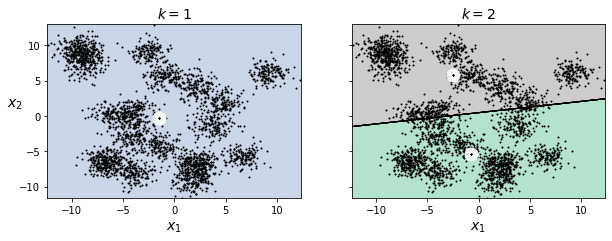

In [56]:
kmeans_k1 = KMeans(n_clusters=1, random_state=42)
kmeans_k2 = KMeans(n_clusters=2, random_state=42)

plot_clusterer_comparison(kmeans_k1, kmeans_k2, X, "$k=1$", "$k=2$")
#save_fig("bad_n_clusters_plot")
plt.show()

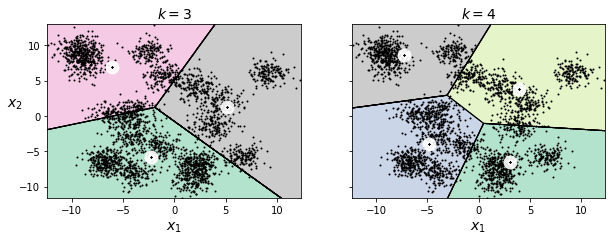

In [57]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k4 = KMeans(n_clusters=4, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k4, X, "$k=3$", "$k=4$")
#save_fig("bad_n_clusters_plot")
plt.show()

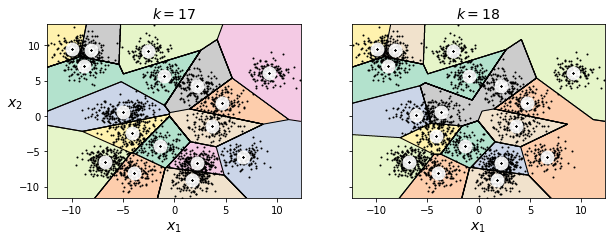

In [58]:
kmeans_k17 = KMeans(n_clusters=17, random_state=42)
kmeans_k18 = KMeans(n_clusters=18, random_state=42)

plot_clusterer_comparison(kmeans_k17, kmeans_k18, X, "$k=17$", "$k=18$")
#save_fig("bad_n_clusters_plot")
plt.show()

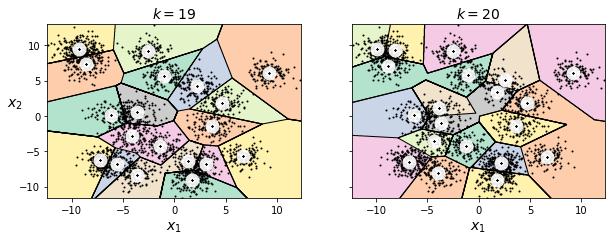

In [59]:

kmeans_k19 = KMeans(n_clusters=19, random_state=42)
kmeans_k20 = KMeans(n_clusters=20, random_state=42)

plot_clusterer_comparison(kmeans_k19, kmeans_k20, X, "$k=19$", "$k=20$")
#save_fig("bad_n_clusters_plot")
plt.show()

In [60]:
print(kmeans_k1.inertia_)
print(kmeans_k2.inertia_)
print(kmeans_k3.inertia_)
print(kmeans_k4.inertia_)
print(kmeans_k17.inertia_)
print(kmeans_k18.inertia_)
print(kmeans_k19.inertia_)
print(kmeans_k20.inertia_)

207430.89354271346
110636.36974375178
66061.29859082663
40644.44122431714
5456.724513279081
5009.776546648263
4848.787265489381
4696.277210743682


In [61]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

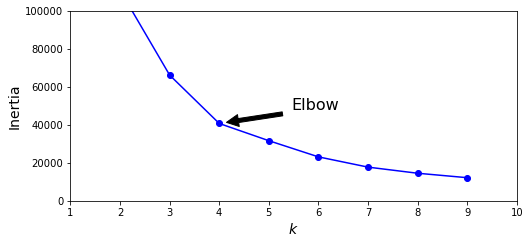

In [63]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 10, 0, 100000])
#save_fig("inertia_vs_k_plot")
plt.show()